In [109]:
# We change the notebook's behaviour to allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

cars = pd.read_csv('autos_small.csv')
# Get some ideas about the data
cars.shape
cars.head()

(10000, 11)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [110]:
cars.isnull().sum() 
cars.describe()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


We could have fill missing numerical values with eg mean values but this is unecessary as we don't have any hole. 
It would be hard to fill the missing values in a consistent way as they are categorical values.
For instance, there is no relatonship between previous/next rows, we cannot either fill blanks using fillna().
The best is probably to filter nil values.

In [111]:
cars.dropna(inplace = True)
cars.isnull().sum()
cars.shape

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

(8010, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164E76FEFD0>,
      dtype=object)

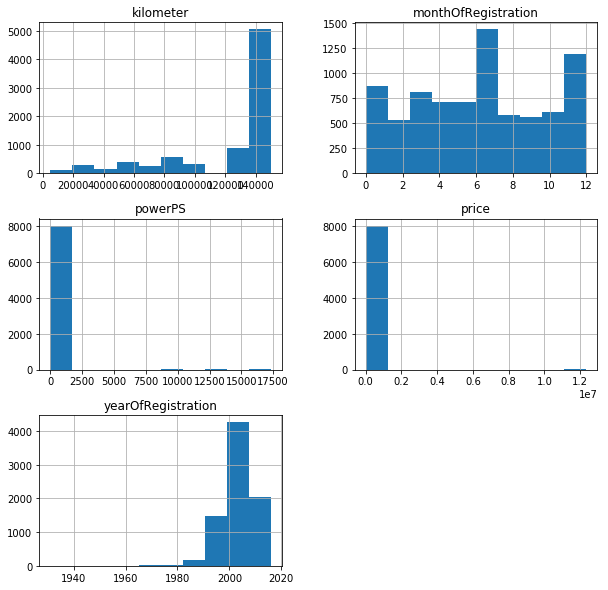

In [112]:
# Get a finer insight about the numerical data first
cars.hist(figsize = (10,10))

According to the histograms we see a lot of skewed distributions or possible outliers, e.g. for power and price.

In [113]:
cars.shape
cars = cars[(cars.price < cars.price.quantile(0.95)) & (cars.price > cars.price.quantile(0.05))]
cars = cars[(cars.powerPS < cars.powerPS.quantile(0.95)) & (cars.powerPS > cars.powerPS.quantile(0.05))]
cars.shape

(8010, 11)

(6477, 11)

Using the histogram and the min/max values we can focus of the main variation range of each variable to get a better idea of the correlation with the price.

[Text(0,0.5,'Price'), Text(0.5,0,'Kilometers')]

(0, 100000)

(0, 10000)

[Text(0,0.5,'Price'), Text(0.5,0,'Year')]

(1980, 2020)

(0, 10000)

[Text(0,0.5,'Price'), Text(0.5,0,'Power')]

(0, 300)

(0, 10000)

[Text(0,0.5,'Price'), Text(0.5,0,'Month')]

(0, 12)

(0, 10000)

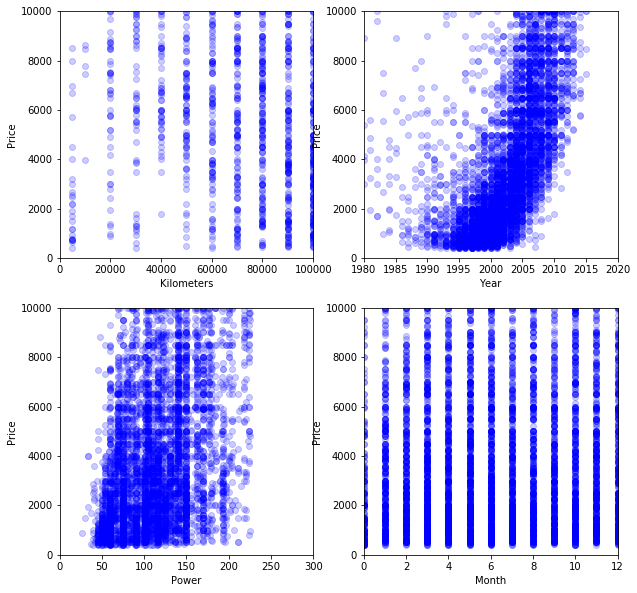

In [114]:
plot, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0, 0].scatter(cars.kilometer, cars.price, color='blue', alpha=0.20)
axes[0, 0].set(ylabel='Price', xlabel='Kilometers')
# If we remove this range outliers cause the graph to be unusable
axes[0, 0].set_xlim([0, 100000])
axes[0, 0].set_ylim([0, 10000])
axes[0, 1].scatter(cars.yearOfRegistration, cars.price, color='blue', alpha=0.20)
axes[0, 1].set(ylabel='Price', xlabel='Year')
# If we remove this range outliers cause the graph to be unusable
axes[0, 1].set_xlim([1980, 2020])
axes[0, 1].set_ylim([0, 10000])
axes[1, 0].scatter(cars.powerPS, cars.price, color='blue', alpha=0.20)
axes[1, 0].set(ylabel='Price', xlabel='Power')
# If we remove this range outliers cause the graph to be unusable
axes[1, 0].set_xlim([0, 300])
axes[1, 0].set_ylim([0, 10000])
axes[1, 1].scatter(cars.monthOfRegistration, cars.price, color='blue', alpha=0.20)
axes[1, 1].set(ylabel='Price', xlabel='Month')
# If we remove this range outliers cause the graph to be unusable
axes[1, 1].set_xlim([0, 12])
axes[1, 1].set_ylim([0, 10000])

There is no obvious linear correlation between price and the different numerical variables.
We can confirm this with a correlation analysis.

**Please note that if we don't filter nil values or outliers results are worse**

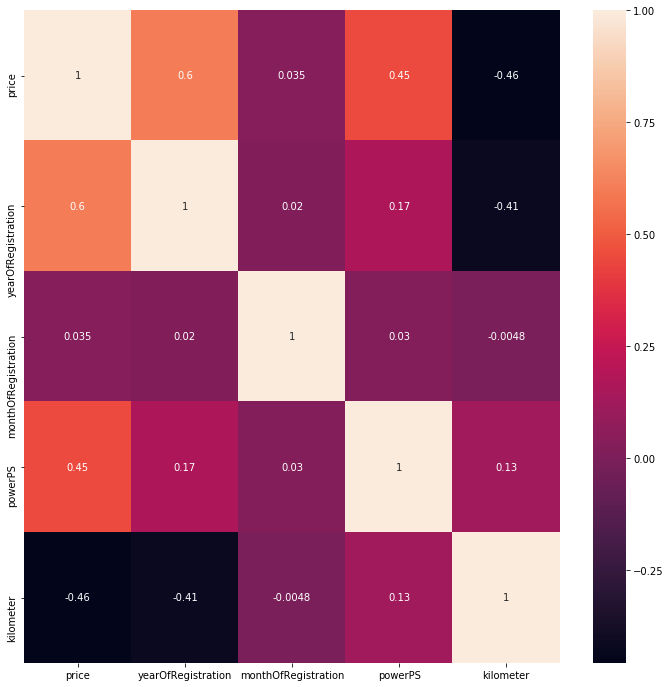

In [116]:
figure, axes = plt.subplots(figsize = (12,12))
axes = sns.heatmap(cars.corr(), annot = True)

We can also have a look to some categorical variables of suspected interest like the vehicle type, brand, gearbox, etc.

<Figure size 1440x360 with 0 Axes>

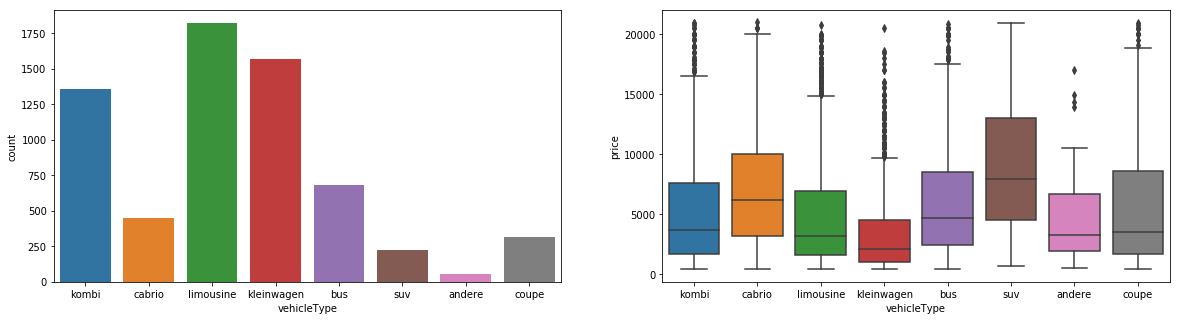

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(cars.vehicleType)
plt.subplot(1, 2, 2)
sns.boxplot(x=cars.vehicleType, y=cars.price)

<Figure size 1440x576 with 0 Axes>

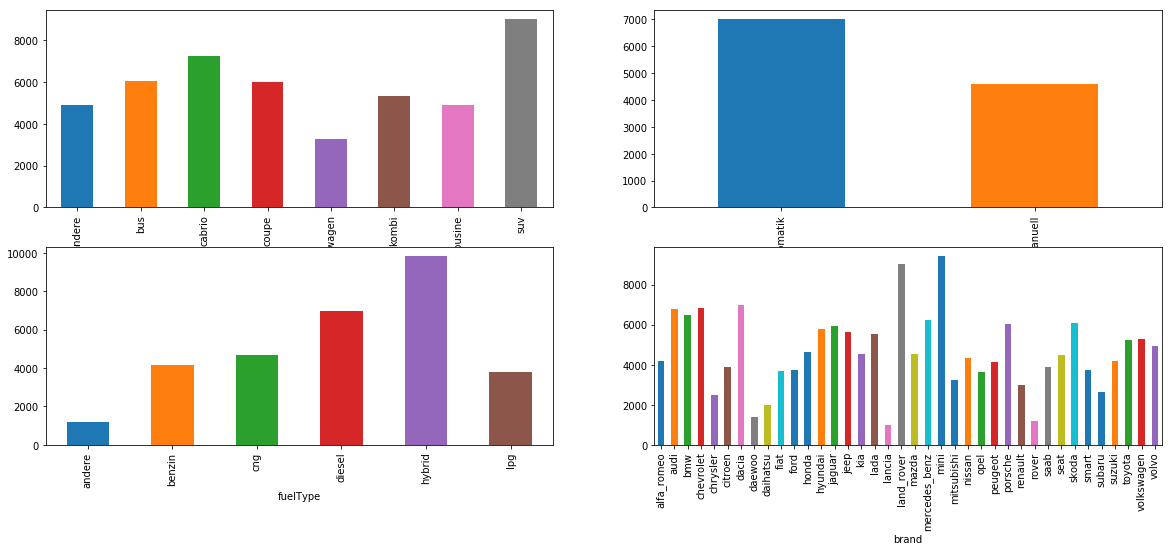

In [118]:
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
avgPrice = cars.groupby(['vehicleType'])['price'].mean()
avgPrice.plot.bar()
plt.subplot(2, 2, 2)
avgPrice = cars.groupby(['gearbox'])['price'].mean()
avgPrice.plot.bar()
plt.subplot(2, 2, 3)
avgPrice = cars.groupby(['fuelType'])['price'].mean()
avgPrice.plot.bar()
plt.subplot(2, 2, 4)
avgPrice = cars.groupby(['brand'])['price'].mean()
avgPrice.plot.bar()

To make a correlation analysis including categorical variables we first need to create dummy variables.
For now we will omit some variables we don't think that are useful, then add the dummy ones.

In [119]:
carsLR = cars.drop(['name', 'model', 'brand', 'monthOfRegistration'], axis=1)
carsLR = pd.concat([carsLR, pd.get_dummies(carsLR.vehicleType, drop_first=True)], axis = 1)
carsLR = pd.concat([carsLR, pd.get_dummies(carsLR.gearbox, drop_first=True)], axis = 1)
carsLR = pd.concat([carsLR, pd.get_dummies(carsLR.fuelType, drop_first=True)], axis = 1)
carsLR.drop(['vehicleType', 'gearbox', 'fuelType'], axis=1, inplace=True)
carsLR.head()

,price,yearOfRegistration,powerPS,kilometer,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv,manuell,benzin,cng,diesel,hybrid,lpg
0,400,1992,89,60000,0,0,0,0,1,0,0,1,1,0,0,0,0
2,2200,1998,150,150000,0,0,0,0,1,0,0,1,1,0,0,0,0
4,2600,2002,41,150000,0,1,0,0,0,0,0,0,0,0,1,0,0
5,2222,2001,143,150000,0,0,0,0,0,1,0,1,1,0,0,0,0
6,4000,2008,69,125000,0,0,0,1,0,0,0,1,1,0,0,0,0


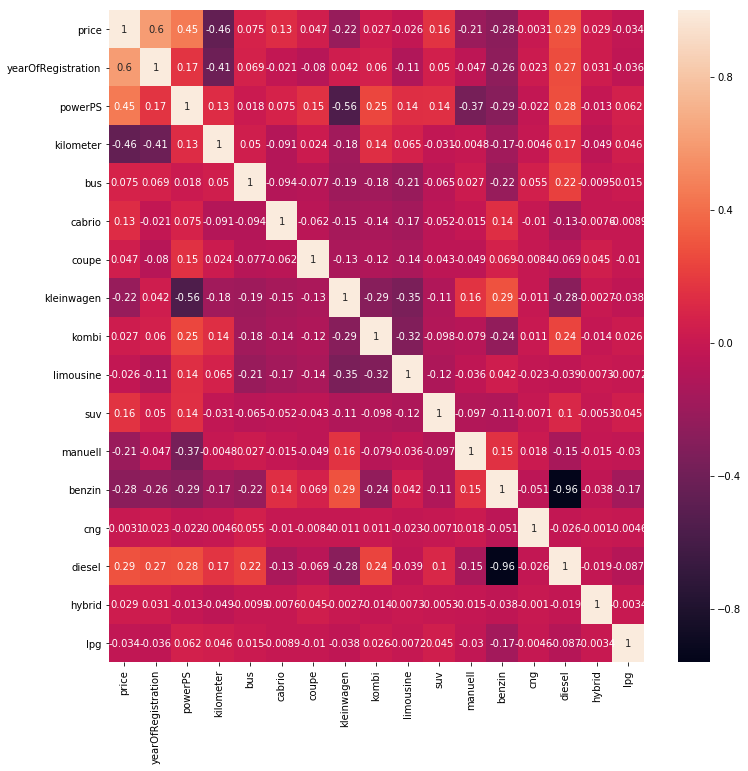

In [120]:
figure, axes = plt.subplots(figsize = (12,12))
axes = sns.heatmap(carsLR.corr(), annot = True)

Most correlation values are pretty low, our linear regression model will not be really good.

**Please note that if we don't filter nil values or outliers results are worse**

In [121]:
# It seems that using this module can save us a lot of work as 
# it almost provides what has been done previously directly for each variable.
# However I did not succeeded in installing it on my Anaconda (weird error on install)
#import pandas_profiling
#pandas_profiling.ProfileReport(cars)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Slipt data into train/test datasets
cars_train, cars_test = train_test_split(carsLR, train_size = 0.7, test_size = 0.3)
# Normalize numerical values
cars_train[['price', 'powerPS', 'kilometer']] = MinMaxScaler().fit_transform(cars_train[['price', 'powerPS', 'kilometer']])
# Create input data for regression model
Y = cars_train.pop('price')
X = cars_train
model = LinearRegression().fit(X, Y)
# Then make some prediction and evaluate results
prediction = model.predict(cars_test.drop(['price'], axis=1))
Y_test = cars_test.pop('price')
print('RMSE is {:4.2f}'.format(sqrt(mean_squared_error(Y_test, prediction))))


D:\Applications\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Applications\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


RMSE is 46182.84


D:\Applications\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


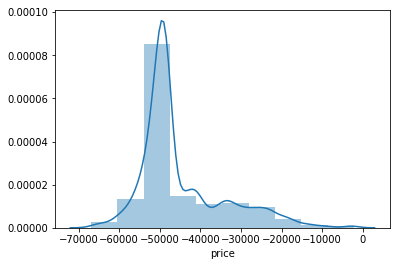

In [129]:
figure = plt.figure()
sns.distplot((prediction - Y_test), bins = 10)

We can see that our regression model is not so good as the error distribution is a little skewed.

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({
    'factor': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    'feature': X.columns
})
vif.round(1)

,factor,feature
0,1.5,yearOfRegistration
1,1.9,powerPS
2,1.4,kilometer
3,11.4,bus
4,8.0,cabrio
5,6.3,coupe
6,20.8,kleinwagen
7,19.3,kombi
8,22.8,limousine
9,5.1,suv


VIF shows that a lot of our features are redundant, a feature ranking algorithm can be used to identifty the most relevant ones.

In [135]:
from sklearn.feature_selection import RFE
rfe = RFE(model)
rfe = rfe.fit(X, Y)
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('yearOfRegistration', False, 6),
 ('powerPS', True, 1),
 ('kilometer', True, 1),
 ('bus', False, 2),
 ('cabrio', True, 1),
 ('coupe', False, 4),
 ('kleinwagen', False, 7),
 ('kombi', False, 3),
 ('limousine', False, 8),
 ('suv', True, 1),
 ('manuell', False, 9),
 ('benzin', True, 1),
 ('cng', False, 5),
 ('diesel', True, 1),
 ('hybrid', True, 1),
 ('lpg', True, 1)]

In [26]:
# Summary of tasks to be done
# 1. Load the cars dataset.
# 2. Figure out the best strategy to fill missing values
# 3. Complete any other preprocessing required.
# 4. Apply various regression models and find out which model is the best for this dataset
# 5. Apply different Outlier detection methods and choose best approach to treat outliers
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables